# PCA on the MNIST dataset

We can use PCA to speed up ML algorithms. See [this article](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60).

We are going to use the MNIST database of handwritten digits. It is more suitable than the Iris dataset as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.

We import the standard libraries.

In [28]:
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

We download the data:

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


The images are contained in `mnist.data`, and has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features, 28x28 images).

In [4]:
mnist.data.shape

(70000, 784)

The labels (the integers 0–9) are contained in `mnist.target`. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

In [5]:
mnist.target.shape

(70000,)

In [6]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(mnist.data,
                                                    mnist.target,
                                                    test_size=1/7.0,
                                                    random_state=0)

PCA is effected by scale so you need to scale the features in the data before applying PCA. You can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. `StandardScaler` helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set. 

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

We import PCA: notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained (this is in alternative to choosing the number of principal components).

In [9]:
# Make an instance of the Model
pca = PCA(.95)

Time to fit PCA on training set. We fit PCA on the training set only.

In [10]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.n_components_

327

We see that the 95% of variance/information is retained by `pca.n_components_`, which is 327.

Moreover, we can check how the images change when we go from the full information to a 95% of variance. By using `inverse_transform` we can go from a compressed representation (154 components) back to an approximation of the original high dimensional data (784 components).

In [19]:
pca_approx_95 = PCA(.95)
pca_approx_70 = PCA(.70)

In [20]:
lower_dimensional_data_95 = pca_approx_95.fit_transform(mnist.data)
lower_dimensional_data_70 = pca_approx_70.fit_transform(mnist.data)

In [21]:
pca_approx_95.n_components_, pca_approx_70.n_components_, 

(154, 26)

In [22]:
approximation_95 = pca_approx_95.inverse_transform(lower_dimensional_data_95)
approximation_70 = pca_approx_70.inverse_transform(lower_dimensional_data_70)

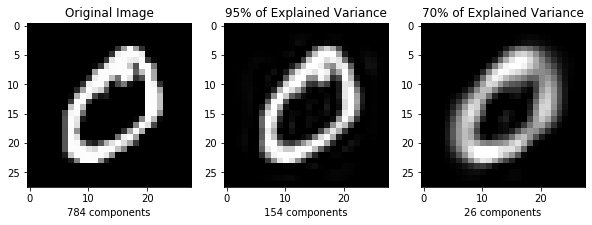

In [31]:
plt.figure(figsize=(10, 8));

# Original Image
plt.subplot(131);
plt.imshow(mnist.data[1].reshape(28,28), cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255));
plt.xlabel('784 components', fontsize = 10)
plt.title('Original Image', fontsize = 12);

# 154 principal components
plt.subplot(132);
plt.imshow(approximation_95[1].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255));
plt.xlabel('154 components', fontsize = 10)
plt.title('95% of Explained Variance', fontsize = 12);

# 26 principal components
plt.subplot(133);
plt.imshow(approximation_70[1].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255));
plt.xlabel('26 components', fontsize = 10)
plt.title('70% of Explained Variance', fontsize = 12);

After this explanation, we can train our model to the splitted data.

In [ ]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

Now we apply a logistic regression to the data:

#### Step 1: import the model and create an instance

In [ ]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logRegr = LogisticRegression(solver = 'lbfgs')

#### Step 2: train the model
Model is learning the relationship between digits and labels:

In [ ]:
logRegr.fit(X_train, y_train)

#### Step 4: Predict the labels of new data (new images)

The code below predicts for one observation:

In [ ]:
# Predict for One Observation (image)
logRegr.predict(X_test[0].reshape(1,-1))

The code below predicts for multiple observations at once:

In [ ]:
# Predict for One Observation (image)
logRegr.predict(X_test[0:10])

In [ ]:
X_test[0].show()

In order to see if our model is performing well, we check its accuracy (it is not always the best metric for machine learning algorithms (precision, recall, F1 Score, ROC Curve, etc would be better), it is used here for simplicity).

In [ ]:
logRegr.score(X_test, y_test)

The whole point of this section of the tutorial was to show that you can use PCA to speed up the fitting of machine learning algorithms. We could check the time it takes to train the data, but it is usually less than using the entire dataset with all the features.

### Showing graph of Explained Variance vs Number of Principal Components

We could also think of showing how the number of components influences the variance and why sometimes it is useful to choose a lower number of components, not having a big different in variance (but a lot of difference in execution time).

In [32]:
# if n_components is not set all components are kept (784 in this case)
pca = PCA()

pca.fit(mnist.data)
pca.n_components_

784

The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

In [33]:
pca.explained_variance_

array([3.34294061e+05, 2.45433427e+05, 2.10930355e+05, 1.85337356e+05,
       1.67691572e+05, 1.47670297e+05, 1.12445139e+05, 9.91153833e+04,
       9.46125388e+04, 8.03359569e+04, 7.22599113e+04, 6.98885540e+04,
       5.85527059e+04, 5.81052758e+04, 5.43103821e+04, 5.09819786e+04,
       4.52543057e+04, 4.38704888e+04, 4.07237248e+04, 3.95459992e+04,
       3.65654146e+04, 3.46361826e+04, 3.28991121e+04, 3.12006965e+04,
       3.02969450e+04, 2.87716612e+04, 2.77774204e+04, 2.69503081e+04,
       2.53911681e+04, 2.36676475e+04, 2.25058928e+04, 2.21397823e+04,
       2.06082429e+04, 2.00866202e+04, 1.94397800e+04, 1.86411711e+04,
       1.73119138e+04, 1.67069383e+04, 1.64282735e+04, 1.60385718e+04,
       1.55849505e+04, 1.52607921e+04, 1.43449274e+04, 1.35885149e+04,
       1.31612657e+04, 1.28895069e+04, 1.23970063e+04, 1.19716256e+04,
       1.16185734e+04, 1.09656535e+04, 1.08681675e+04, 1.06380432e+04,
       1.01693456e+04, 9.84764699e+03, 9.69028943e+03, 9.24126224e+03,
      

The explained variance ration tells use the percentage of information each components has.

In [43]:
exp_var_ratio = pca.explained_variance_ratio_*100
exp_var_ratio

784

In [41]:
# Cumulative explained variance
cum_exp_var = np.cumsum(exp_var_ratio)

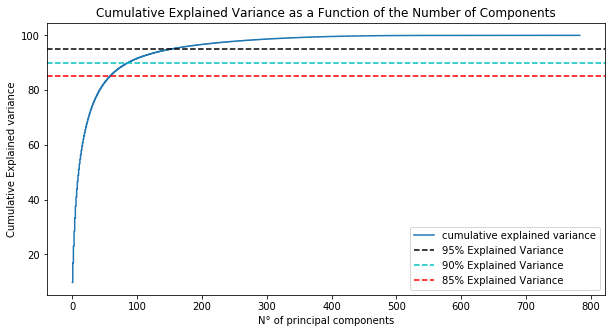

In [47]:
plt.figure(figsize=(10, 5))
plt.step(range(0, exp_var_ratio.shape[0]), cum_exp_var, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('N° of principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()